In [2]:
import sys
import pygame
import carla
import numpy as np
import random
import math
import cv2
import time
from agents.navigation.global_route_planner import GlobalRoutePlanner
from IPython.display import Image

pygame 2.5.2 (SDL 2.28.2, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Basic Config

In [5]:
# Carla path
sys.path.append('~/Documents/CARLA_0.9.15/PythonAPI/carla')

# Carla connection
client = carla.Client('localhost', 2000)

In [6]:
world = client.get_world()
world = client.load_world('Town02')
world.set_weather(carla.WeatherParameters.Default)

In [7]:
spawn_points = world.get_map().get_spawn_points()

### Routes Plan

In order to improve the learning of the agent and to stimulate its exploration, we will create three routes (straight, left curve, right curve) that will be chosen randomly in each episode.

#### Straight

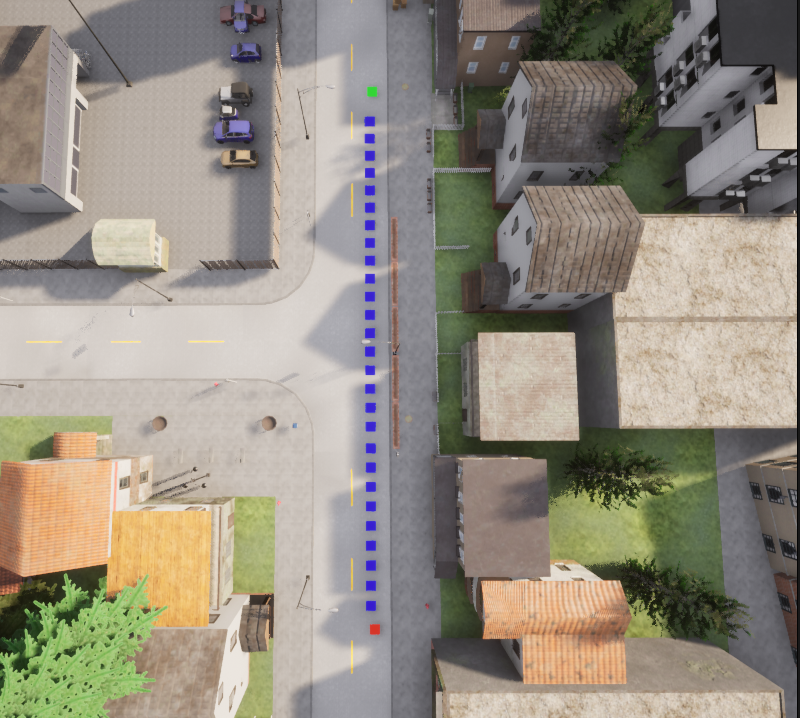

In [10]:
Image("imgs/straight.png", width=400, height=400)

##### Debug route on the simulator

In [11]:
point_a = spawn_points[46]
point_b = spawn_points[48]

: 

In [9]:
# Point a
world.debug.draw_point(point_a.location,
                       color=carla.Color(r=255, g=0, b=0),
                       life_time=60)

# Point b
world.debug.draw_point(point_b.location,
                       color=carla.Color(r=0, g=255, b=0),
                       life_time=60)

# Route Planner
grp = GlobalRoutePlanner(world.get_map(), 2)

# Route waypoints list
route = []

route = grp.trace_route(point_a.location, point_b.location)

print("Number of wp:", len(route))

for i in range(1,len(route)):
    world.debug.draw_point(carla.Location(x=route[i][0].transform.location.x, y=route[i][0].transform.location.y, z=0.8),
                           color=carla.Color(r=0, g=0, b=255),
                           life_time=60)

Number of wp: 30


In [17]:
for i in range(1,len(route)):
    world.debug.draw_point(carla.Location(x=route[i][0].transform.location.x, y=route[i][0].transform.location.y, z=0.8),
                           color=carla.Color(r=0, g=0, b=0))

#### Left Curve

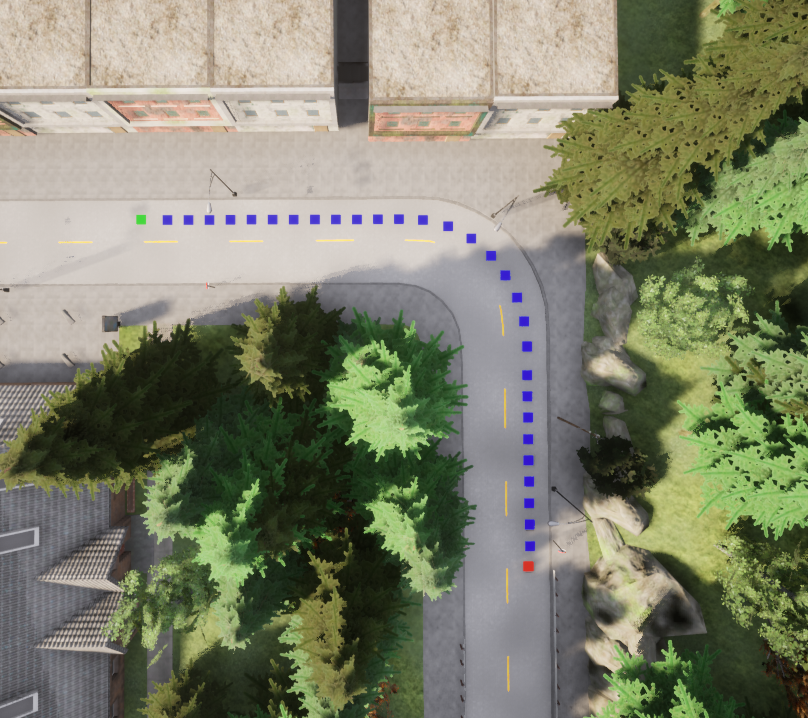

In [142]:
Image("imgs/left_curve.png", width=400, height=400)

##### Debug route on the simulator

In [140]:
point_a = spawn_points[28]
point_b = spawn_points[0]

In [141]:
# Point a
world.debug.draw_point(point_a.location,
                       color=carla.Color(r=255, g=0, b=0),
                       life_time=60)

# Point b
world.debug.draw_point(point_b.location,
                       color=carla.Color(r=0, g=255, b=0),
                       life_time=60)

# Route Planner
grp = GlobalRoutePlanner(world.get_map(), 2)

# Route waypoints list
route = []

route = grp.trace_route(point_a.location, point_b.location)
print("Number of wp:", len(route))

for i in range(1,len(route)):
    world.debug.draw_point(carla.Location(x=route[i][0].transform.location.x, y=route[i][0].transform.location.y, z=0.8),
                           color=carla.Color(r=0, g=0, b=255),
                           life_time=60)

Number of wp: 32


#### Right Curve

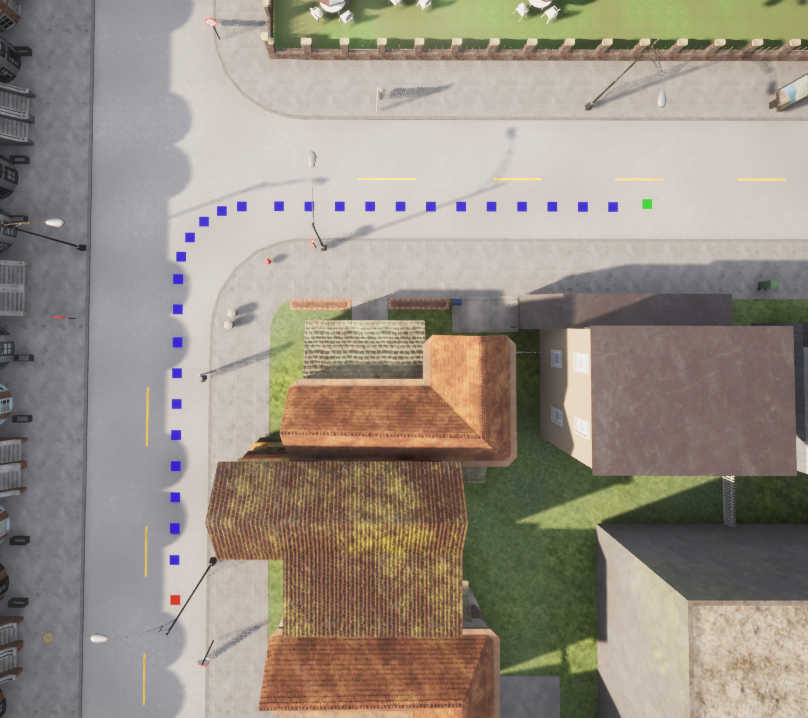

In [59]:
Image("imgs/right_curve.png", width=400, height=400)

##### Debug route on the simulator

In [57]:
point_a = spawn_points[39]
point_b = spawn_points[71]

In [60]:
# Point a
world.debug.draw_point(point_a.location,
                       color=carla.Color(r=255, g=0, b=0),
                       life_time=60)

# Point b
world.debug.draw_point(point_b.location,
                       color=carla.Color(r=0, g=255, b=0),
                       life_time=60)

# Route Planner
grp = GlobalRoutePlanner(world.get_map(), 2)

# Route waypoints list
route = []

route = grp.trace_route(point_a.location, point_b.location)
print("Number of wp:", len(route))

for i in range(1,len(route)):
    world.debug.draw_point(carla.Location(x=route[i][0].transform.location.x, y=route[i][0].transform.location.y, z=0.8),
                           color=carla.Color(r=0, g=0, b=255),
                           life_time=60)

Number of wp: 30
